# MARATONA BEHIND THE CODE 2020

## DESAFIO 6 - LIT

<hr>

## Installing Libs

In [51]:
!pip install scikit-learn --upgrade

Requirement already up-to-date: scikit-learn in c:\users\cpcle\anaconda3\lib\site-packages (0.23.2)


In [52]:
!pip install xgboost --upgrade

Requirement already up-to-date: xgboost in c:\users\cpcle\anaconda3\lib\site-packages (1.2.0)


In [53]:
!pip install imblearn --upgrade

Requirement already up-to-date: imblearn in c:\users\cpcle\anaconda3\lib\site-packages (0.0)


<hr>

## Download dos conjuntos de dados em formato .csv

In [54]:
import pandas as pd

In [55]:
#!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/dataset-3/master/training_dataset.csv
df_training_dataset = pd.read_csv(r'C:\Users\cpcle\OneDrive\Documentos\Celso\Maratona Behind the Code 2020\Desafio 6\training_dataset.csv')
df_training_dataset.tail()

,id,graduacao,universidade,profissao,organizacao,pretende_fazer_cursos_lit,interesse_mba_lit,importante_ter_certificado,horas_semanais_estudo,como_conheceu_lit,total_modulos,modulos_iniciados,modulos_finalizados,certificados,categoria
15852,620397030.0,Bacharelado,UFF,Outros,Borracha,0.0,0.0,1.0,8.0,NaN,10.0,NaN,NaN,NaN,perfil6
15853,229931283.0,Bacharelado,NaN,Advogado,NaN,0.0,0.0,1.0,7.0,Linkedin,42.0,17.0,15.0,NaN,perfil5
15854,480674907.0,Tecnólogo,UNIP,Sócio/Dono/Proprietário,NaN,0.0,NaN,1.0,7.0,Outros,30.0,9.0,8.0,0.0,perfil5
15855,559626807.0,SEM FORMAÇÃO,UNIVERSIDADE NOVE DE JULHO,Advogado,Estado,0.0,0.0,1.0,10.0,NaN,226.0,102.0,93.0,1.0,perfil1
15856,743652801.0,NaN,FGV-RJ,NaN,Siderurgica,1.0,1.0,1.0,9.0,Outros,125.0,98.0,97.0,1.0,perfil1


Sobre o arquivo "training_dataset.csv", temos algumas informações gerais sobre os usuários da plataforma:

**id**

**graduacao**

**universidade**

**profissao**

**organizacao**

**pretende_fazer_cursos_lit**

**interesse_mba_lit**

**importante_ter_certificado**

**horas_semanais_estudo**

**como_conheceu_lit**

**total_modulos**

**modulos_iniciados**

**modulos_finalizados**

**certificados**

**categoria**

In [56]:
df_training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15857 entries, 0 to 15856
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          13945 non-null  float64
 1   graduacao                   13950 non-null  object 
 2   universidade                13920 non-null  object 
 3   profissao                   13977 non-null  object 
 4   organizacao                 13961 non-null  object 
 5   pretende_fazer_cursos_lit   13989 non-null  float64
 6   interesse_mba_lit           14003 non-null  float64
 7   importante_ter_certificado  13918 non-null  float64
 8   horas_semanais_estudo       13959 non-null  float64
 9   como_conheceu_lit           13915 non-null  object 
 10  total_modulos               13987 non-null  float64
 11  modulos_iniciados           14044 non-null  float64
 12  modulos_finalizados         13924 non-null  float64
 13  certificados                139

In [57]:
df_training_dataset.nunique()

id                            13945
graduacao                         6
universidade                     21
profissao                        12
organizacao                      11
pretende_fazer_cursos_lit         2
interesse_mba_lit                 2
importante_ter_certificado        1
horas_semanais_estudo             9
como_conheceu_lit                 9
total_modulos                   578
modulos_iniciados               372
modulos_finalizados             339
certificados                     23
categoria                         6
dtype: int64

## Análise dos dados:

In [58]:
# Quantidade de NaN's por coluna
print('Quantidade de na''s por coluna')
print(df_training_dataset.isna().sum())

# Distribuição dos categóricos
print('\nQuantidade de categorias não únicas:')
print(df_training_dataset.nunique())

# Print columns with less than 30 categories
print('\nDetahamento das colunas com até 30 categorias')
a = df_training_dataset.nunique()
a = [col for col in a.index if a.loc[col] < 30]
for col in a:
    print('\n' + col)
    print(df_training_dataset[col].value_counts())

Quantidade de nas por coluna
id                            1912
graduacao                     1907
universidade                  1937
profissao                     1880
organizacao                   1896
pretende_fazer_cursos_lit     1868
interesse_mba_lit             1854
importante_ter_certificado    1939
horas_semanais_estudo         1898
como_conheceu_lit             1942
total_modulos                 1870
modulos_iniciados             1813
modulos_finalizados           1933
certificados                  1878
categoria                        0
dtype: int64

Quantidade de categorias não únicas:
id                            13945
graduacao                         6
universidade                     21
profissao                        12
organizacao                      11
pretende_fazer_cursos_lit         2
interesse_mba_lit                 2
importante_ter_certificado        1
horas_semanais_estudo             9
como_conheceu_lit                 9
total_modulos                   578

<hr>

## Detalhamento do desafio: classificação multiclasse

Este é um desafio cujo objetivo de negócio é a segmentação dos usuários de uma plataforma de ensino. Para tal, podemos utilizar duas abordagens: aprendizado de máquina supervisionado (classificação) ou não-supervisionado (clustering). Neste desafio será aplicada a classificação, pois é disponível um dataset já com "labels", ou em outras palavras, já com exemplos de dados juntamente com a variável alvo.

Na biblioteca scikit-learn temos diversos algoritmos para classificação. O participante é livre para utilizar o framework que desejar para completar esse desafio.

Neste notebook será mostrado um exeplo de uso do algoritmo "Decision Tree" para classificar parte dos estudantes em seis diferentes perfís.

# Atenção!

A coluna-alvo neste desafio é a coluna ``categoria``

<hr>

Aqui importamos todas as biblitecas que serão utilizadas para o balanceamento e treinamento dos dados

In [59]:
from sklearn.model_selection  import train_test_split
                                     
from sklearn.pipeline         import FeatureUnion
                                     
from sklearn.preprocessing    import OneHotEncoder, FunctionTransformer
from sklearn.metrics          import f1_score, accuracy_score,\
                                     plot_confusion_matrix
# Balanceamento das categorias
from imblearn.over_sampling   import SMOTE
from imblearn.under_sampling  import RandomUnderSampler
from imblearn.pipeline        import Pipeline

# Algoritmo utilizado XGBClassifier
import xgboost                as xgb

Não vamos utilizar as colunas 'id' e 'importante_ter_certificado', pois id é um índice e a outra é constante.

## Pre-processando o dataset antes do treinamento

Separando as colunas categóricas, das numéricas:

In [60]:
# Lista de colunas não utilizadas
drop_cols = ['id', 'importante_ter_certificado']

# Cria lista das colunas categóricas
a = df_training_dataset.nunique()
col_cat = [col for col in a.index if  (df_training_dataset[col].dtype == 'O')
                                & (col != 'categoria')]

# Lista de colunas categóricas a codificar
col_cat = [col for col in col_cat if col not in drop_cols]
# Lista colunas numéricas
col_num = [col for col in df_training_dataset.columns if col not in \
                                         (col_cat + drop_cols + ['categoria'])]

del a

### Selecionando FEATURES (X) e definindo a variável TARGET (y)

In [61]:
X = df_training_dataset.iloc[:,:-1]
y = df_training_dataset.iloc[:,-1]

### Criando a partição de treino (80%) e de testes (20%)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state = 123)

### Preparando os parâmetros para o OneHotEncoder, e para a substituição dos na's

In [63]:
# Busca categorias das colunas categóricas
categorias = {}
for col in col_cat:    
    categorias[col]= list(df_training_dataset[col].value_counts().index)
    
# Preenche NaNs
valores = {'universidade':'Não Informada', 'graduacao':'Não Informada',
           'profissao':'Não Informada', 'organizacao':'Não Informada',
           'pretende_fazer_cursos_lit':0.0,
           'interesse_mba_lit':0.0,
           'horas_semanais_estudo': X_train['horas_semanais_estudo'].mean(),
           'como_conheceu_lit':'Outros',
           'total_modulos':X_train['total_modulos'].mean(),
           'modulos_iniciados':X_train['modulos_iniciados'].mean(),
           'modulos_finalizados':X_train['modulos_finalizados'].mean(),
           'certificados':X_train['certificados'].mean()
           }

# Adiciona categorias preenchidos
for col in categorias:
    if valores[col] not in categorias[col]:
        categorias[col].append(valores[col])       
        
# Gera lista de categorias a codificar
lista_cat = [categorias[col] for col in col_cat]

# Apaga variáveis já utilizadas
del [df_training_dataset, col]

### Removendo as colunas que não serão utilizadas pelo algoritmo

In [64]:
drop_columns = FunctionTransformer(lambda x: x.drop(columns = drop_cols,
                                                    inplace= False),
                                   validate=False)

### Substituindo os valores nulos

In [65]:
fill_columns = FunctionTransformer(lambda x: x.fillna(value = valores,
                                                      inplace= False),
                                   validate=False)

### Separação em colunas categóricas e colunas numéricas

In [66]:
categorical_columns = FunctionTransformer(lambda x: x[col_cat],
                                          validate=False)

numeric_columns = FunctionTransformer(lambda x: x[col_num],
                                      validate=False)


### Balanceamento das categorias alvo

In [67]:
over = SMOTE(sampling_strategy='auto')

under = RandomUnderSampler(sampling_strategy='auto', random_state=555)

### Codificação das colunas categóricas

In [68]:
ohe = OneHotEncoder(handle_unknown='ignore', categories=lista_cat)


### Modelo Extreme Gradient Booster, com parâmetros já refinados

In [69]:
model = xgb.XGBClassifier(booster='gbtree',
                          n_estimators=200, eta=0.05, max_depth=6,
                          min_child_weight=2, gamma=0.5, subsample=1,
                          colsample_bytree=1, objective='multi:softmax',
                          eval_metric='merror', num_class=6, n_jobs=4)

<hr>

## Montando o Pipeline

In [70]:
# Colunas categóricas
cat_features_steps = [('cc', categorical_columns),
                      ('ohe', ohe)]

# União de categóricas com numéricas
union = FeatureUnion([('cf', Pipeline(cat_features_steps)),
                      ('nc', numeric_columns)
                      ])

# Assemble Pipeline
steps = [('dc'   , drop_columns),
         ('fc'   , fill_columns),
         ('un'   , union),
         ('over', over),
         ('under', under), 
         ('model', model)]

pipe = Pipeline(steps=steps)

### Treinando o Pipeline

In [71]:
pipe.fit(X_train, y_train)


Pipeline(steps=[('dc',
                 FunctionTransformer(func=<function <lambda> at 0x000001A990DCE828>)),
                ('fc',
                 FunctionTransformer(func=<function <lambda> at 0x000001A990DCEC18>)),
                ('un',
                 FeatureUnion(transformer_list=[('cf',
                                                 Pipeline(steps=[('cc',
                                                                  FunctionTransformer(func=<function <lambda> at 0x000001A990DDD048>)),
                                                                 ('ohe',
                                                                  OneHotEncoder(categories=[['Licenciatura',
                                                                                             'Bacharela...
                               interaction_constraints='',
                               learning_rate=0.0500000007, max_delta_step=0,
                               max_depth=6, min_child_weight=2, missi

### Fazendo previsões na amostra de teste

In [72]:
y_pred = pipe.predict(X_test)
print(y_pred)

['perfil2' 'perfil5' 'perfil2' ... 'perfil1' 'perfil6' 'perfil3']


### Analisando a qualidade do modelo através da matriz de confusão

In [73]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if cmap is None:
        cmap = plt.get_cmap('Blues')
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

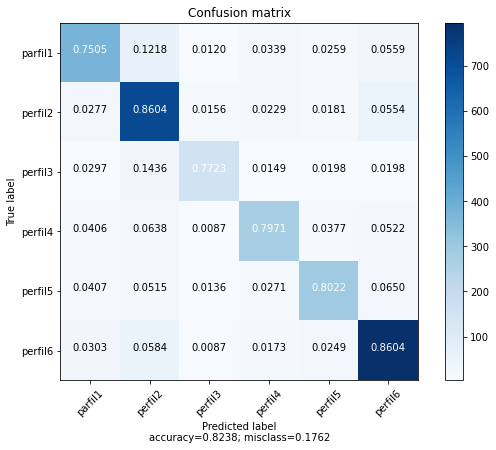

In [74]:
from sklearn.metrics import confusion_matrix


plot_confusion_matrix(confusion_matrix(y_test, y_pred), ['parfil1', 'perfil2', 'perfil3', 'perfil4', 'perfil5', 'perfil6'])

<hr>

## Retreinando o modelo com todos os dados

In [76]:
# Recalcula novas médias, com o arquivo completo
# Preenche NaNs
valores = {'universidade':'Não Informada', 'graduacao':'Não Informada',
           'profissao':'Não Informada', 'organizacao':'Não Informada',
           'pretende_fazer_cursos_lit':0.0,
           'interesse_mba_lit':0.0,
           'horas_semanais_estudo': X['horas_semanais_estudo'].mean(),
           'como_conheceu_lit':'Outros',
           'total_modulos':X['total_modulos'].mean(),
           'modulos_iniciados':X['modulos_iniciados'].mean(),
           'modulos_finalizados':X['modulos_finalizados'].mean(),
           'certificados':X['certificados'].mean()
           }

fill_columns = FunctionTransformer(lambda x: x.fillna(value = valores,
                                                      inplace= False),
                                   validate=False)

categorical_columns = FunctionTransformer(lambda x: x[col_cat],
                                          validate=False)

# Colunas categóricas
cat_features_steps = [('cc', categorical_columns),
                      ('ohe', ohe)]

# União de categóricas com numéricas
union = FeatureUnion([('cf', Pipeline(cat_features_steps)),
                      ('nc', numeric_columns)
                      ])

# Assemble Pipeline
steps = [('dc'   , drop_columns),
         ('fc'   , fill_columns),
         ('un'   , union),
         ('over', over),
         ('under', under), 
         ('model', model)]

pipe = Pipeline(steps=steps)

In [78]:
pipe.fit(X, y)

Pipeline(steps=[('dc',
                 FunctionTransformer(func=<function <lambda> at 0x000001A990DCE828>)),
                ('fc',
                 FunctionTransformer(func=<function <lambda> at 0x000001A9910F5168>)),
                ('un',
                 FeatureUnion(transformer_list=[('cf',
                                                 Pipeline(steps=[('cc',
                                                                  FunctionTransformer(func=<function <lambda> at 0x000001A9910F5438>)),
                                                                 ('ohe',
                                                                  OneHotEncoder(categories=[['Licenciatura',
                                                                                             'Bacharela...
                               interaction_constraints='',
                               learning_rate=0.0500000007, max_delta_step=0,
                               max_depth=6, min_child_weight=2, missi

## Scoring dos dados necessários para entregar a solução

Como entrega da sua solução, esperamos os resultados classificados no seguinte dataset chamado "to_be_scored.csv":

### Download da "folha de respostas"

In [80]:
#!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/dataset-3/master/to_be_scored.csv
df_to_be_scored = pd.read_csv(r'C:\Users\cpcle\OneDrive\Documentos\Celso\Maratona Behind the Code 2020\Desafio 6\to_be_scored.csv')
df_to_be_scored.tail()

,id,graduacao,universidade,profissao,organizacao,pretende_fazer_cursos_lit,interesse_mba_lit,importante_ter_certificado,horas_semanais_estudo,como_conheceu_lit,total_modulos,modulos_iniciados,modulos_finalizados,certificados
995,741745189,SEM FORMAÇÃO,UNIVERSIDADE NOVE DE JULHO,Coordenador,Borracha,0,0,1,2,YouTube,245,63,45,1
996,996387882,Bacharelado,UFRN,Assessor,Estado,1,1,1,8,Google,163,111,96,0
997,668869418,Bacharelado,UFSCar,Gerente,Siderurgica,1,1,1,9,Facebook,56,10,4,0
998,676531718,Tecnólogo,FATEC,Outros,servicos,1,1,1,9,Mídia (revista/jornal/web),138,60,30,0
999,388402340,Especialização,UNIP,Advogado,Montadora,0,0,1,9,Mídia (revista/jornal/web),22,20,19,0


# Atenção!

O dataframe ``to_be_scored`` é a sua "folha de respostas". Note que a coluna "categoria" não existe nessa amostra, que não pode ser então utilizada para treino de modelos de aprendizado supervisionado.

In [81]:
df_to_be_scored.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          1000 non-null   int64 
 1   graduacao                   1000 non-null   object
 2   universidade                1000 non-null   object
 3   profissao                   1000 non-null   object
 4   organizacao                 1000 non-null   object
 5   pretende_fazer_cursos_lit   1000 non-null   int64 
 6   interesse_mba_lit           1000 non-null   int64 
 7   importante_ter_certificado  1000 non-null   int64 
 8   horas_semanais_estudo       1000 non-null   int64 
 9   como_conheceu_lit           1000 non-null   object
 10  total_modulos               1000 non-null   int64 
 11  modulos_iniciados           1000 non-null   int64 
 12  modulos_finalizados         1000 non-null   int64 
 13  certificados                1000 non-null   int64

<hr>

## Vamos aplicar o pipeline treinado ao arquivo fornecido:

<hr>

Na célula abaixo, repetimos rapidamente os mesmos passos de pré-processamento usados no exemplo dado com árvore de decisão

<hr>

Pode ser verificado abaixo que as colunas da folha de resposta agora são idênticas às que foram usadas para treinar o modelo:

In [82]:
y_pred = pipe.predict(df_to_be_scored)

In [84]:
df_to_be_scored['target'] = y_pred
df_to_be_scored.tail()

,id,graduacao,universidade,profissao,organizacao,pretende_fazer_cursos_lit,interesse_mba_lit,importante_ter_certificado,horas_semanais_estudo,como_conheceu_lit,total_modulos,modulos_iniciados,modulos_finalizados,certificados,target
995,741745189,SEM FORMAÇÃO,UNIVERSIDADE NOVE DE JULHO,Coordenador,Borracha,0,0,1,2,YouTube,245,63,45,1,perfil1
996,996387882,Bacharelado,UFRN,Assessor,Estado,1,1,1,8,Google,163,111,96,0,perfil2
997,668869418,Bacharelado,UFSCar,Gerente,Siderurgica,1,1,1,9,Facebook,56,10,4,0,perfil6
998,676531718,Tecnólogo,FATEC,Outros,servicos,1,1,1,9,Mídia (revista/jornal/web),138,60,30,0,perfil2
999,388402340,Especialização,UNIP,Advogado,Montadora,0,0,1,9,Mídia (revista/jornal/web),22,20,19,0,perfil3


### Salvando a folha de respostas como um arquivo .csv para ser submetido

In [85]:
project.save_data(file_name=r"C:\Users\cpcle\OneDrive\Documentos\Celso\Maratona Behind the Code 2020\Desafio 6\results.csv", data=df_to_be_scored.to_csv(index=False))

NameError: name 'project' is not defined

# Atenção

# A execução da célula acima irá criar um novo "data asset" no seu projeto no Watson Studio. Você precisará realizar o download deste arquivo juntamente com este notebook e criar um arquivo zip com os arquivos **results.csv** e **notebook.ipynb** para submissão. (os arquivos devem estar nomeados desta forma)

<hr>

## Parabéns!

Se você já está satisfeito com a sua solução, vá até a página abaixo e envie os arquivos necessários para submissão.

# https://lit.maratona.dev
